In [1]:
import csv
import numpy as np

X = np.loadtxt('hitters.x.csv', delimiter=',', skiprows=1)
with open('hitters.x.csv', 'r') as f:
    X_colnames = next(csv.reader(f))

y = np.loadtxt('hitters.y.csv', delimiter=',', skiprows=1)


In [2]:
#Problem 3-1. 

# 1. Scaling ensures that all features have equal weights and prevents any one feature from overpowering the others.
# 2. Scaling features makes the interpretation of alpha more straightforward.
# 3. Large variations in feature values can lead to numerical instabilities, 
# especially when using gradient-based optimization algorithms. 
# Standardizing the features helps mitigate this issue.
# 4. When the features are scaled, the coefficients of the ridge regression model can be interpreted more easily.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

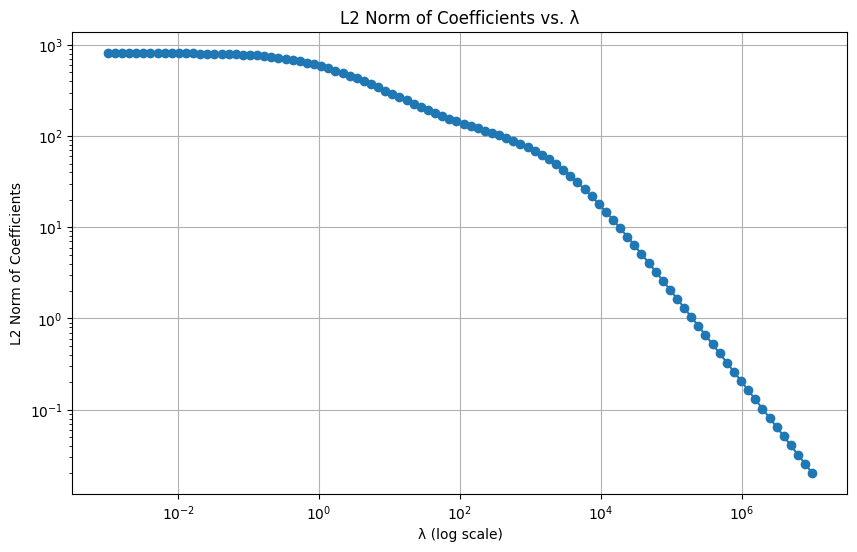

In [4]:
#Problem 3-3. 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

lambdas = np.logspace(-3, 7, 100)

l2_norms = []

for alpha in lambdas:
    ridge = Ridge(alpha=alpha, fit_intercept=True, solver='auto')
    ridge.fit(X, y)
    
    coefficients = ridge.coef_
    
    l2_norm = np.linalg.norm(coefficients[1:])
    
    l2_norms.append(l2_norm)

plt.figure(figsize=(10, 6))
plt.loglog(lambdas, l2_norms, marker='o')
plt.title('L2 Norm of Coefficients vs. λ')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 Norm of Coefficients')
plt.grid()
plt.show()


In [5]:
#Problem 3-4. 

import numpy as np
from sklearn.linear_model import Ridge

lambda_small = 1e-6  
lambda_large = 1e6

ridge_small = Ridge(alpha=lambda_small, fit_intercept=True)
ridge_small.fit(X, y)

ridge_large = Ridge(alpha=lambda_large, fit_intercept=True)
ridge_large.fit(X, y)

least_squares = Ridge(alpha=0, fit_intercept=True)
least_squares.fit(X, y)

coeff_small_lambda = ridge_small.coef_
coeff_large_lambda = ridge_large.coef_
coeff_least_squares = least_squares.coef_

print("Coefficients for Small Lambda:")
print(coeff_small_lambda)

print("\nCoefficients for Large Lambda:")
print(coeff_large_lambda)

print("\nCoefficients for Least Squares:")
print(coeff_least_squares)

Coefficients for Small Lambda:
[-291.0946081   337.83051492   37.85380731  -60.57247659  -26.99493205
  135.0739315   -16.69333264 -391.03844949   86.68732831  -14.18175469
  480.74740261  260.6898459  -213.89239438   31.24874959  -58.41399662
   78.76122933   53.73243352  -22.16080499  -12.34883348]

Coefficients for Large Lambda:
[ 0.04666088  0.05186084  0.04053656  0.04963197  0.05312474  0.05247341
  0.0473423   0.06218041  0.06487681  0.06204106  0.06650412  0.06701109
  0.05788527 -0.00167336 -0.02278176  0.03554373  0.00300839 -0.00064142
 -0.00032317]

Coefficients for Least Squares:
[-291.09462584  337.83057573   37.85384355  -60.57253276  -26.99496538
  135.07394623  -16.69329665 -391.03867469   86.68713265  -14.18188514
  480.74772158  260.69007975 -213.8924465    31.24874897  -58.41399362
   78.76122932   53.73244107  -22.16080176  -12.34882979]


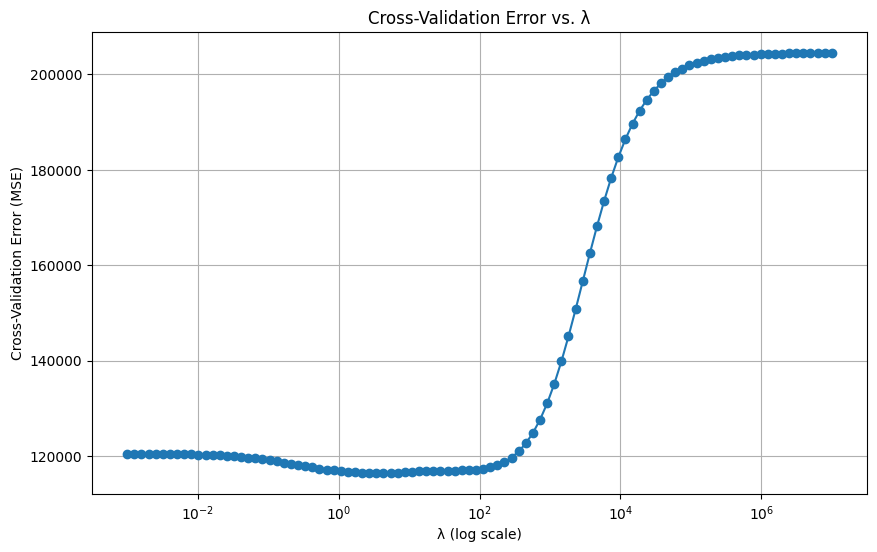

Best λ: 3.4304692863149193


In [6]:
#Problem 3-5. 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

lambdas = np.logspace(-3, 7, 100)

cross_val_errors = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in lambdas:
    errors = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        ridge = Ridge(alpha=alpha, fit_intercept=True)
        ridge.fit(X_train, y_train)
        
        y_val_pred = ridge.predict(X_val)
        mse = np.mean((y_val - y_val_pred) ** 2)
        errors.append(mse)
    
    avg_error = np.mean(errors)
    cross_val_errors.append(avg_error)

plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, cross_val_errors, marker='o')
plt.title('Cross-Validation Error vs. λ')
plt.xlabel('λ (log scale)')
plt.ylabel('Cross-Validation Error (MSE)')
plt.grid()
plt.show()

best_lambda = lambdas[np.argmin(cross_val_errors)]
print("Best λ:", best_lambda)

In [7]:
#Problem 3-6. 

from sklearn.linear_model import Ridge

best_alpha = best_lambda
ridge = Ridge(alpha=best_alpha, fit_intercept=True)
ridge.fit(X, y)

coefficient_estimates = ridge.coef_

print("Coefficient Estimates at Best Lambda:")
print(coefficient_estimates)

Coefficient Estimates at Best Lambda:
[-216.7135697   232.24767963    1.92036138   -0.57929799    4.7630262
  107.08567474  -51.38091379  -96.09252277  120.7017663    57.8786959
  201.46448603  115.4980765  -146.35781502   30.27023414  -61.72203805
   77.60812637   39.28028711  -25.11336507  -13.60323595]
